In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/training.csv')

In [3]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
df.columns = ['id','last_donation_months','num_donations','volume_donated','first_donation_months','march_donation']

In [5]:
df.set_index(['id'], inplace=True)

In [6]:
df.groupby('march_donation').mean()

,last_donation_months,num_donations,volume_donated,first_donation_months
march_donation,,,,
0,10.636986,4.716895,1179.223744,34.319635
1,5.637681,7.681159,1920.289855,33.195652


In [7]:
print df.groupby('march_donation')['num_donations'].count()
print 'Class imbalance: {}'.format(df.groupby('march_donation')['num_donations'].count()[1]/float(len(df)))

march_donation
0    438
1    138
Name: num_donations, dtype: int64
Class imbalance: 0.239583333333


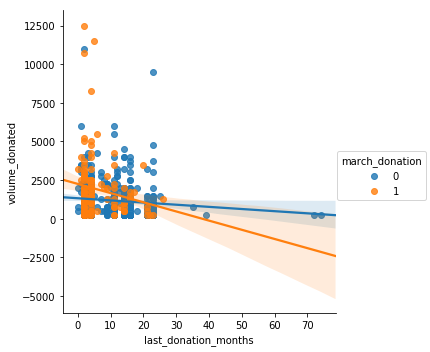

In [8]:
plt.figure(figsize=(12,8))
sns.lmplot(x='last_donation_months',y='volume_donated',data=df, hue='march_donation')

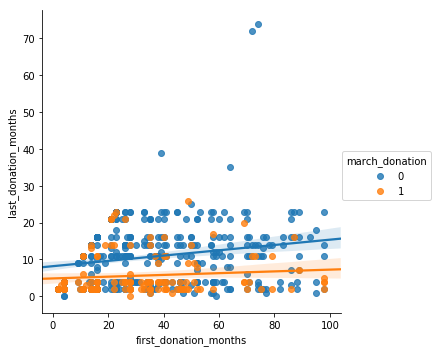

In [9]:
plt.figure(figsize=(12,8))
sns.lmplot(x='first_donation_months',y='last_donation_months',data=df, hue='march_donation')

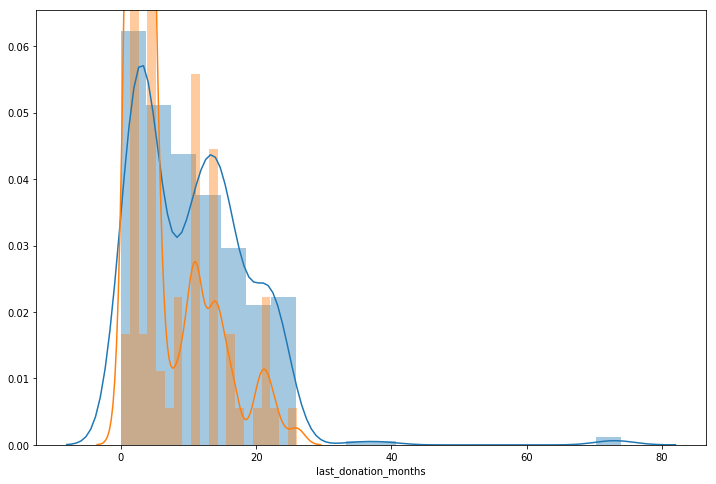

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df[df.march_donation==0].last_donation_months, bins=20)
sns.distplot(df[df.march_donation==1].last_donation_months, bins=20)

In [12]:
df['interaction_last_month_num_donations'] =  df['last_donation_months']*df['num_donations']

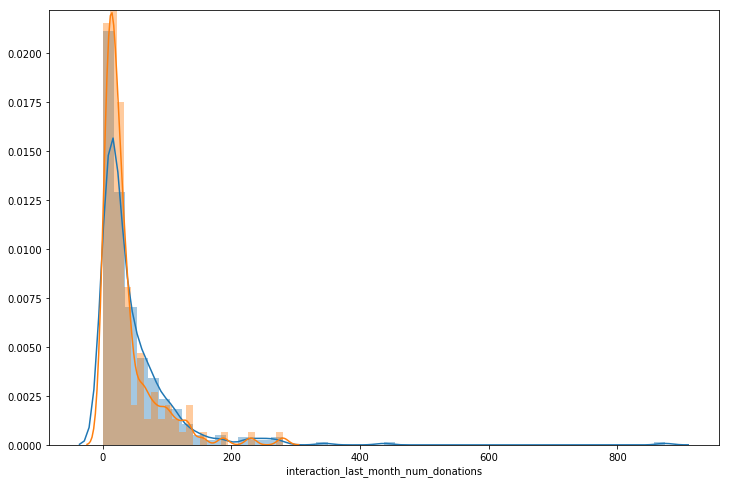

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(df[df.march_donation==0].interaction_last_month_num_donations)
sns.distplot(df[df.march_donation==1].interaction_last_month_num_donations)

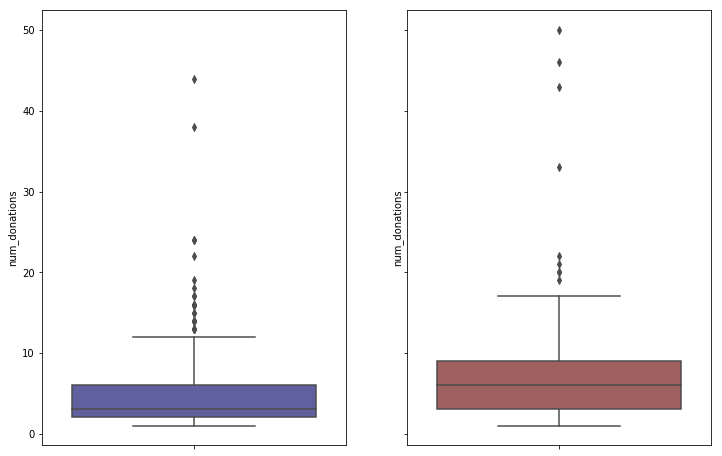

In [14]:
fig, axes = plt.subplots(1,2,figsize=(12,8),sharey=True)
sns.boxplot(y='num_donations', data=df[df.march_donation==0], color='b', saturation=0.25, ax=axes[0])
sns.boxplot(y='num_donations', data=df[df.march_donation==1],color='r', saturation=0.25, ax=axes[1])

In [15]:
df.volume_donated.astype(float, inplace=True)
df['average_volume'] = np.divide(df.volume_donated,df.num_donations)
df.drop(['average_volume', 'volume_donated'],axis=1, inplace=True)
# Every one donates 250 per donation. Only use number of visits

In [16]:
df.head()

,last_donation_months,num_donations,first_donation_months,march_donation,interaction_last_month_num_donations
id,,,,,
619,2,50,98,1,100
664,0,13,28,1,0
441,1,16,35,1,16
160,2,20,45,1,40
358,1,24,77,0,24


In [17]:
df['donation_length'] = df['first_donation_months']-df['last_donation_months']

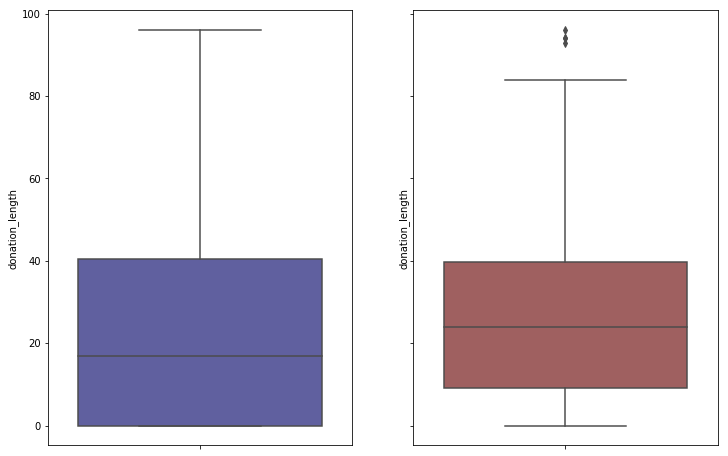

In [18]:
fig, axes = plt.subplots(1,2,figsize=(12,8),sharey=True)
sns.boxplot(y='donation_length', data=df[df.march_donation==0], color='b', saturation=0.25, ax=axes[0])
sns.boxplot(y='donation_length', data=df[df.march_donation==1],color='r', saturation=0.25, ax=axes[1])

In [19]:
df['num_donations'].astype(float)
df['avg_donations_per_month'] = df['donation_length'] / df['num_donations']

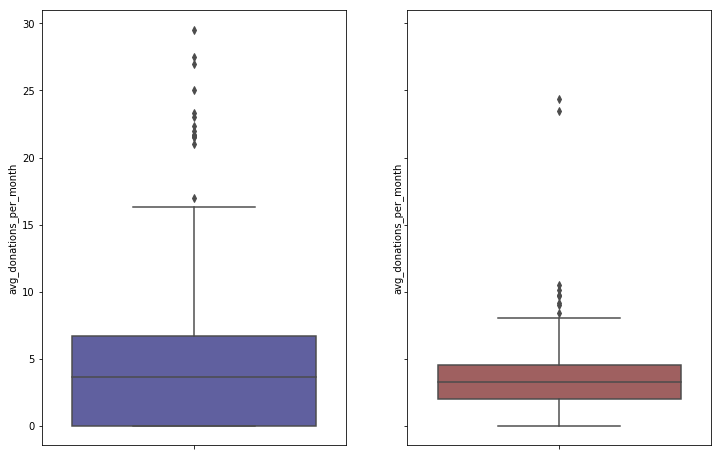

In [20]:
fig, axes = plt.subplots(1,2,figsize=(12,8),sharey=True)
sns.boxplot(y='avg_donations_per_month', data=df[df.march_donation==0], color='b', saturation=0.25, ax=axes[0])
sns.boxplot(y='avg_donations_per_month', data=df[df.march_donation==1],color='r', saturation=0.25, ax=axes[1])

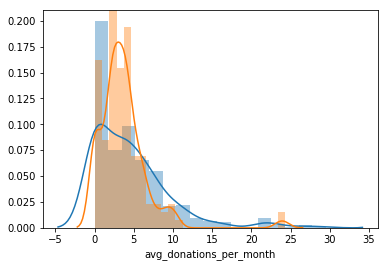

In [21]:
sns.distplot(df[df.march_donation==0].avg_donations_per_month)
sns.distplot(df[df.march_donation==1].avg_donations_per_month)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 619 to 74
Data columns (total 7 columns):
last_donation_months                    576 non-null int64
num_donations                           576 non-null int64
first_donation_months                   576 non-null int64
march_donation                          576 non-null int64
interaction_last_month_num_donations    576 non-null int64
donation_length                         576 non-null int64
avg_donations_per_month                 576 non-null float64
dtypes: float64(1), int64(6)
memory usage: 56.0 KB


In [24]:
df.head()

,last_donation_months,num_donations,first_donation_months,march_donation,interaction_last_month_num_donations,donation_length,avg_donations_per_month
id,,,,,,,
619,2,50,98,1,100,96,1.920000
664,0,13,28,1,0,28,2.153846
441,1,16,35,1,16,34,2.125000
160,2,20,45,1,40,43,2.150000
358,1,24,77,0,24,76,3.166667


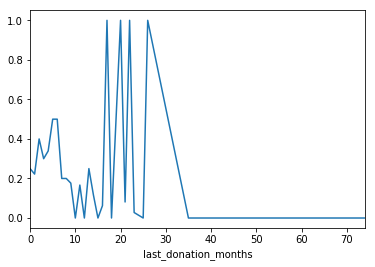

In [46]:
df.groupby('last_donation_months')['march_donation'].mean().plot()

In [35]:
df["last_donation_grtr_35"] = np.where(df.last_donation_months > 35,1,0)

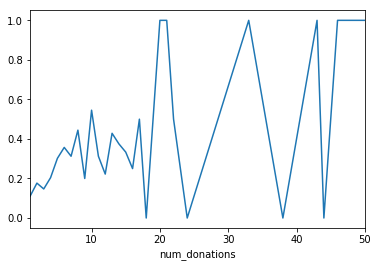

In [38]:
df.groupby('num_donations')['march_donation'].mean().plot()

In [39]:
df.to_csv('data/df_with_features.csv')

In [40]:
df.head()

,last_donation_months,num_donations,first_donation_months,march_donation,interaction_last_month_num_donations,donation_length,avg_donations_per_month,last_donation_grtr_35
id,,,,,,,,
619,2,50,98,1,100,96,1.920000,0
664,0,13,28,1,0,28,2.153846,0
441,1,16,35,1,16,34,2.125000,0
160,2,20,45,1,40,43,2.150000,0
358,1,24,77,0,24,76,3.166667,0


In [42]:
df['last_donation_months'].astype(float)
df['first_last_ratio'] = df['last_donation_months'] / df['first_donation_months']

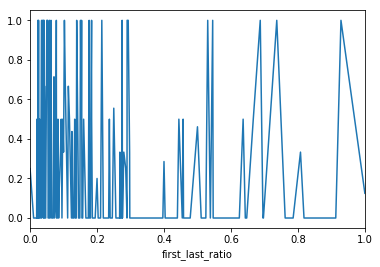

In [44]:
df.groupby('first_last_ratio')['march_donation'].mean().plot()

In [57]:
df['avg_period'] = df['num_donations'] /  df['donation_length']
df['avg_period'] = df['avg_period'].replace(np.inf, 1)

In [63]:
df['avg_wait_between_donations'] = df['donation_length'] / df['num_donations']

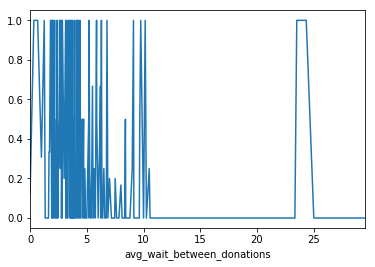

In [64]:
df.groupby('avg_wait_between_donations')['march_donation'].mean().plot()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 619 to 74
Data columns (total 10 columns):
last_donation_months                    576 non-null int64
num_donations                           576 non-null int64
first_donation_months                   576 non-null int64
march_donation                          576 non-null int64
interaction_last_month_num_donations    576 non-null int64
donation_length                         576 non-null int64
avg_donations_per_month                 576 non-null float64
last_donation_grtr_35                   576 non-null int64
first_last_ratio                        576 non-null float64
avg_period                              576 non-null float64
dtypes: float64(3), int64(7)
memory usage: 69.5 KB


In [53]:
df.donation_length

id
619    96
664    28
441    34
160    43
358    76
335     0
47     12
164    34
736    93
436     4
460    26
285    46
499    13
356     9
40     46
191    47
638    13
345     2
463     2
372    24
8      14
539    14
734    36
573    10
482    17
330    57
222    24
175    24
606    62
340    26
       ..
577    63
118    27
532     0
338    22
365    21
173    42
715    55
2       5
387    14
738    46
610    17
450    19
232     0
440     0
183    25
60      0
58      0
49     16
674    12
204    65
361     0
30      0
337     0
496     0
169     0
698     0
433    70
360    31
541     0
74      0
Name: donation_length, Length: 576, dtype: int64